# MonteCarlo Integration

Using MonteCarlo integration, check that

$I = \int_0^{\infty} dx \hspace{0.1 cm}  x^{3}\exp\left(-\frac{x^{2}}{2\sigma^2}\right) = 2\sigma^{4}$

$I = \sqrt{2\pi}\sigma \int_0^{\infty} dx \hspace{0.1 cm} x^3 \mathcal{G}(0,\sigma) \approx \sqrt{2\pi}\sigma \frac{1}{2N}\sum_{i=1}^{N} z_{i}^3$

with $z_i$ sampled from $\mathcal{G(x|0,\sigma)}$ with $x>0$

In [4]:
import numpy as np

In [5]:
sigma = 1 # Standard deviation of the Gaussian distribution

In [7]:
x = np.random.normal(0, sigma, int(1e5)) # sample N points from the Gaussian distribution
x = x[x>0]

In [8]:
z = x**3 # Evaluate f(x) in the extracted point x

In [9]:
I = np.sqrt(2*np.pi)*sigma*z.mean()/2 #compute the integral using the mean value theorem

In [10]:
print(I - 2*sigma**4) #Residual of the integral

-0.027954188528127144


Let's see if the result converges as $N \to \infty$

In [11]:
Ns = np.power(10, np.linspace(1, 6, 1000))

In [12]:
def compute_integral(N):
    x = np.random.normal(0, sigma, int(N))
    x = x[x>0]
    z = x**3
    return np.sqrt(2*np.pi)*sigma*z.mean()/2

In [13]:
result = []
for N in Ns:
    result.append(compute_integral(N))

In [14]:
import matplotlib.pyplot as plt

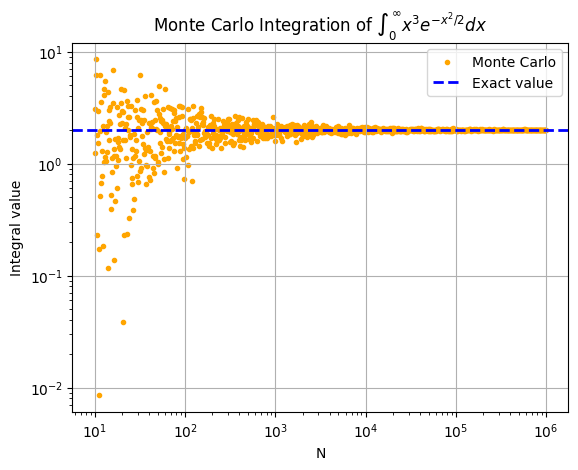

In [15]:
plt.scatter(Ns, result, marker='.', color='orange',label='Monte Carlo')
plt.axhline(2*sigma**4, color='blue', label='Exact value', linestyle='--', linewidth=2)
plt.loglog()
plt.xlabel('N')
plt.ylabel('Integral value')
plt.title('Monte Carlo Integration of $\\int_0^\\infty x^3 e^{-x^2/2} dx$')
plt.legend()
plt.grid()

We can see that as the number of extracted numbers increases, the result of the MonteCarlo simulation converges to the real result.\
What happens if we do the computation with a fixed (high) value of extractions for a number of trials and plot the distribution as a function of the number of trials?

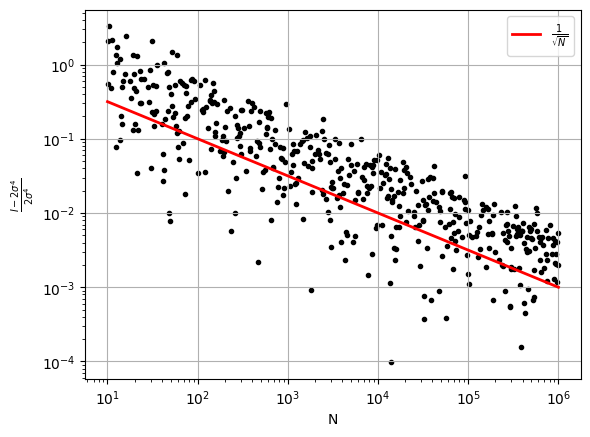

In [37]:
plt.scatter(Ns, (np.array(result) - (2*sigma**4))/(2*sigma**4), marker='.', color='black')
plt.plot(Ns, Ns**-0.5, linewidth=2, color='red', label=r'$\frac{1}{\sqrt{N}}$')
plt.loglog()
plt.xlabel('N')
plt.ylabel(r'$\frac{I - 2\sigma^{4}}{2\sigma^{4}}$')
plt.legend()
plt.grid()

Let's see how the distribution of integral values changes as N increases

In [96]:
trials = np.power(10,np.linspace(1, 4, 8))

In [97]:
means, stds = [], []

In [98]:
dist = []
for i, N in enumerate(trials, 1):
    estimates = np.array([compute_integral(int(1e5)) for _ in range(int(N))])
    dist.append(estimates)
    means.append(estimates.mean())
    stds.append(estimates.std())

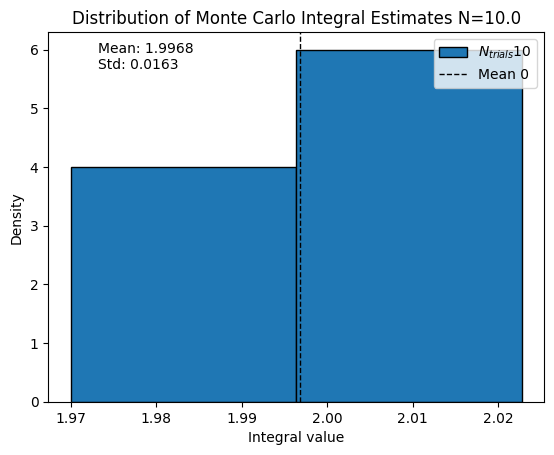

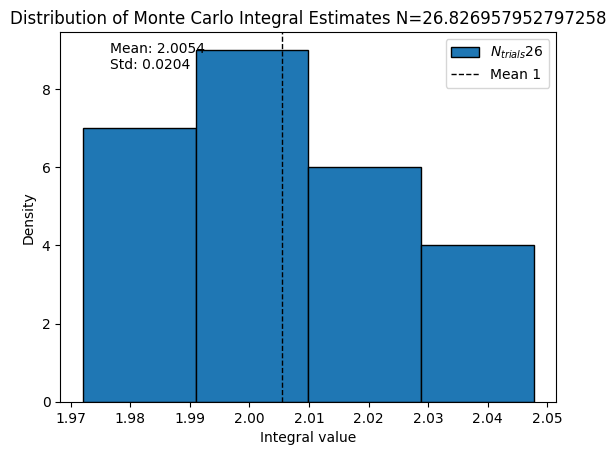

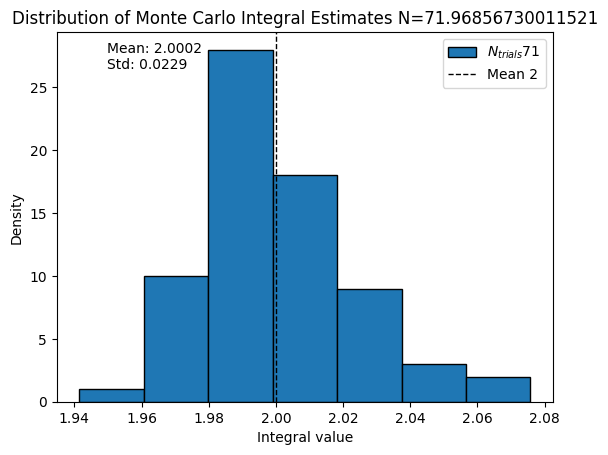

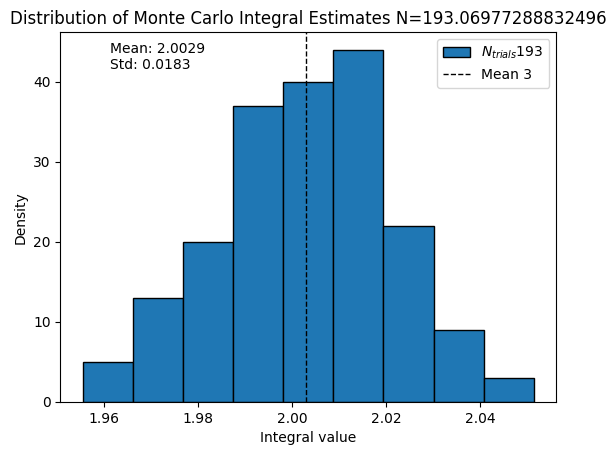

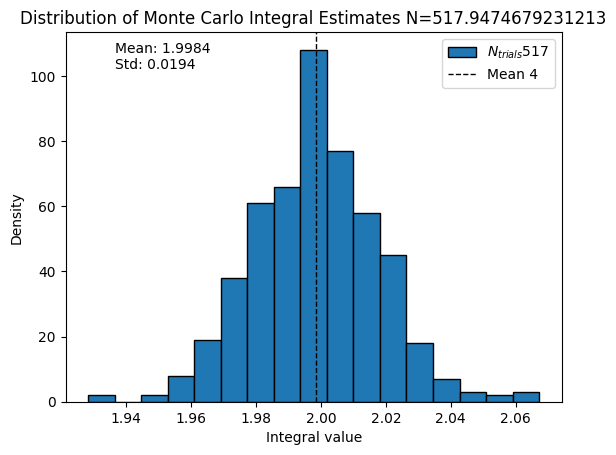

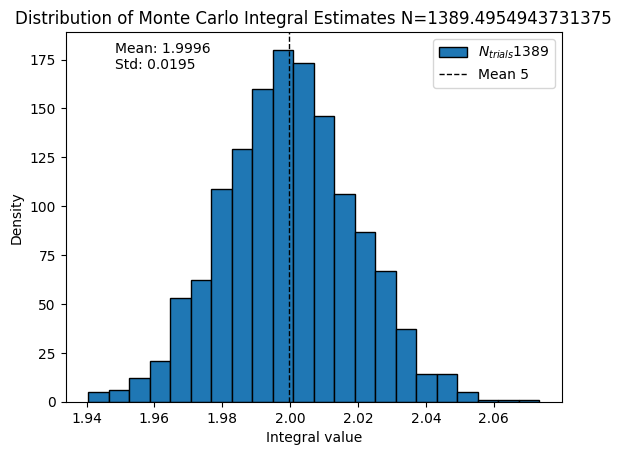

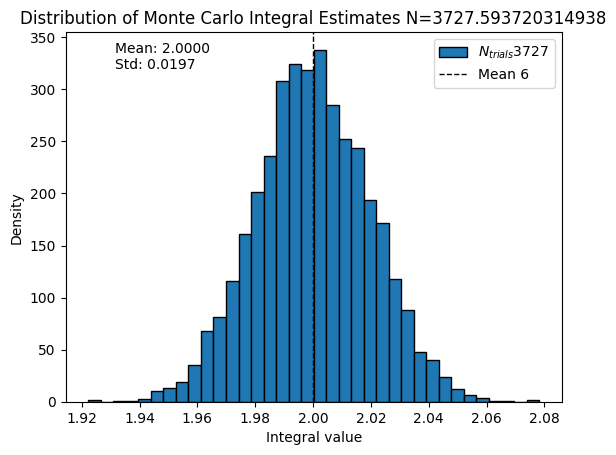

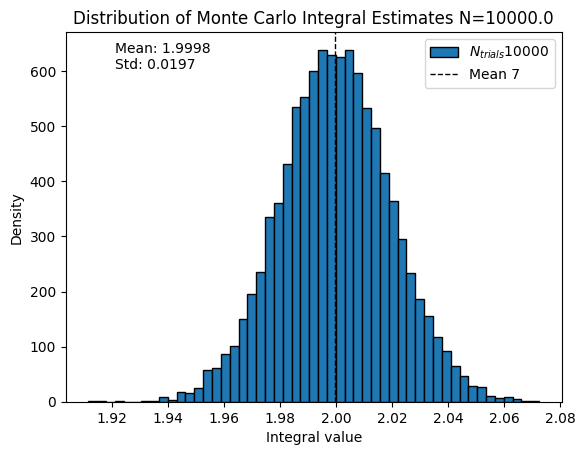

In [100]:
for i,trial in enumerate(trials):
    plt.hist(dist[i], bins='scott', label=r'$N_{trials}$'+f'{int(trial)}', density=False, edgecolor='black')
    plt.axvline(np.mean(dist[i]), color='black', linestyle='--', linewidth=1, label=f'Mean {int(i)}')
    plt.title(f'Distribution of Monte Carlo Integral Estimates N={trial}')
    plt.text(0.1, 0.9, f'Mean: {np.mean(dist[i]):.4f}\nStd: {np.std(dist[i]):.4f}', transform=plt.gca().transAxes)
    plt.xlabel('Integral value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [101]:
means = [np.mean(d) for d in dist]
stds = [np.std(d) for d in dist]

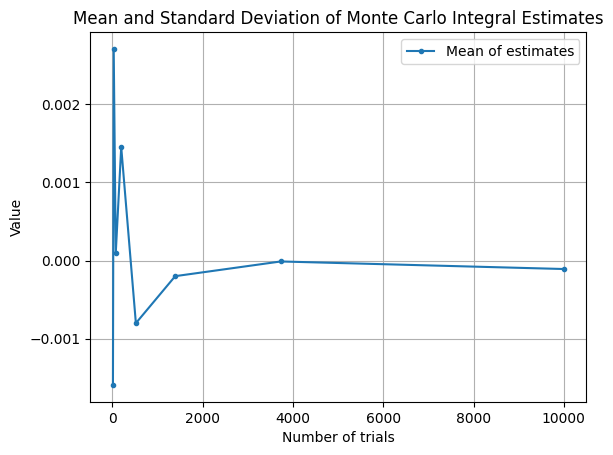

In [102]:
plt.plot(trials, (np.array(means)-(2*sigma**4))/(2*sigma**4), marker='.', label='Mean of estimates')
plt.xlabel('Number of trials')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation of Monte Carlo Integral Estimates')
plt.legend()
plt.grid()

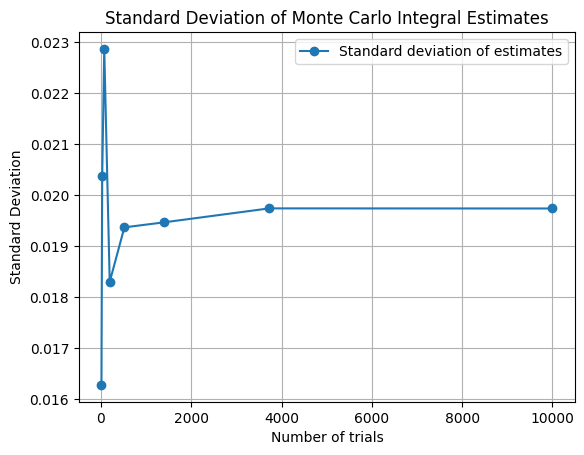

In [103]:
plt.plot(trials, stds, marker='o', label='Standard deviation of estimates')
plt.xlabel('Number of trials')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Monte Carlo Integral Estimates')
plt.legend()
plt.grid()


In [104]:
from scipy.stats import norm

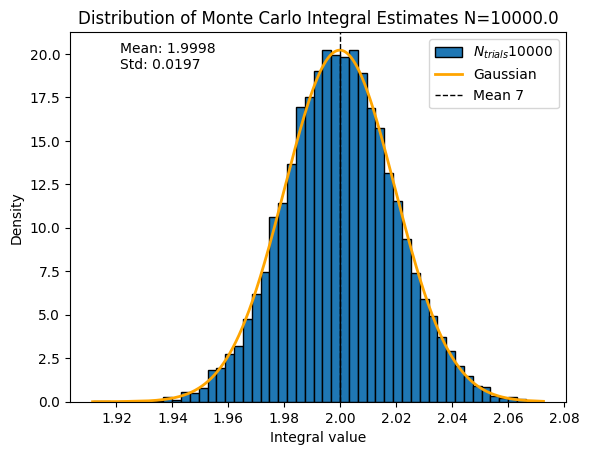

In [105]:
plt.hist(dist[-1], bins='scott', label=r'$N_{trials}$'+f'{int(trial)}', density=True, edgecolor='black')
gauss = norm(loc=means[-1],scale=stds[-1])
plt.plot(np.sort(dist[-1]),gauss.pdf(np.sort(dist[-1])), linewidth=2, color='orange', label='Gaussian')
plt.axvline(np.mean(dist[-1]), color='black', linestyle='--', linewidth=1, label=f'Mean {int(i)}')
plt.title(f'Distribution of Monte Carlo Integral Estimates N={trial}')
plt.text(0.1, 0.9, f'Mean: {np.mean(dist[i]):.4f}\nStd: {np.std(dist[i]):.4f}', transform=plt.gca().transAxes)
plt.xlabel('Integral value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [106]:
sigma/np.sqrt(Ns[-1])

np.float64(0.001)

As suggested by the central limit theorem, the distribution of the random variable $X =$"Integral value" tends to become a Gaussian with mean $\mu \to 2$ and standard deviation $\sigma \to 0$